In [1]:
# HIDDEN
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

In [2]:
# HIDDEN

def standard_units(x):
    return (x - np.mean(x))/np.std(x)

### Rows of Tables ###

Now that we have a qualitative understanding of nearest neighbor classification, it's time to implement our classifier.

Until this chapter, we have worked mostly with single columns of tables. But now we have to see whether one *individual* is "close" to another. Data for individuals are contained in *rows* of tables.

So let's start by taking a closer look at rows.

Here is the original table `ckd` containing data on patients who were tested for chronic kidney disease.

The data file is [ckd.csv]({{ site.baseurl }}/data/ckd.csv).

In [3]:
ckd_full = pd.read_csv('ckd.csv')
ckd_full.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


The data corresponding to the first patient is in row 0 of the table, consistent with Python's indexing system.

We want to fetch the data for this row.

You have already seen how to select rows with boolean arrays, and the `loc` attribute of the data frame.

Now we need to select a row by *index* \- 0, 1, 2 etc.

We do this with Pandas' *indexing* selection, attached to the `iloc` attribute of the data frame, for Indexed LOCate, like this:

In [4]:
first_row = ckd_full.iloc[0]
first_row

Age                                48
Blood Pressure                     70
Specific Gravity                1.005
Albumin                             4
Sugar                               0
Red Blood Cells                normal
Pus Cell                     abnormal
Pus Cell clumps               present
Bacteria                   notpresent
Blood Glucose Random              117
Blood Urea                         56
Serum Creatinine                  3.8
Sodium                            111
Potassium                         2.5
Hemoglobin                       11.2
Packed Cell Volume                 32
White Blood Cell Count           6700
Red Blood Cell Count              3.9
Hypertension                      yes
Diabetes Mellitus                  no
Coronary Artery Disease            no
Appetite                         poor
Pedal Edema                       yes
Anemia                            yes
Class                               1
Name: 0, dtype: object

If the display for this row looks suspiciously like the display you see when fetching a single column from a data frame, this is not a co-incidence.  The row is also a Pandas `Series`:

In [5]:
type(first_row)

pandas.core.series.Series

Notice that the data type (`dtype`) of the row is `object`, and
not something simpler, like a floating point or integer. This
is because the elements can be of different types, so the
Series needs to use the very general `object` type to store all
the values. For example, some of the elements of the row above
are strings (like `'abnormal'`) and some are numerical. So the
row can't be converted into floating point values or integers.

For example, to access the Albumin level of Patient 0, we can look at the labels in the printout of the row above to find that it's the item at index position 3. We can fetch the value with indexing. Again, we use `iloc`, this time indexing into the `Series`.

In [6]:
first_row.iloc[3]

4

### Converting Rows to Numpy arrays  ###

Rows whose elements are all numerical can be converted to numerical Numpy arrays.  Converting a row to a numerical array gives us access to arithmetic operations and other nice NumPy functions, so it is often useful.

Recall that in the previous section we tried to classify the patients as 'CKD' or 'not CKD', based on two attributes `Hemoglobin` and `Glucose`, both measured in standard units.

In [7]:
ckd = pd.DataFrame()
ckd['Hemoglobin'] = standard_units(ckd_full['Hemoglobin'])
ckd['Glucose'] = standard_units(ckd_full['Blood Glucose Random'])
ckd['Class'] = ckd_full['Class']
ckd.head()

,Hemoglobin,Glucose,Class
0,-0.865744,-0.221549,1
1,-1.457446,-0.947597,1
2,-1.004968,3.841231,1
3,-2.814879,0.396364,1
4,-2.083954,0.643529,1


We add the colors for each point, to reflect the Class (with kidney disease or without).

In [8]:
ckd['Color'] = 'darkblue'
ckd.loc[ckd['Class'] == 0, 'Color'] = 'gold'
ckd.head()

,Hemoglobin,Glucose,Class,Color
0,-0.865744,-0.221549,1,darkblue
1,-1.457446,-0.947597,1,darkblue
2,-1.004968,3.841231,1,darkblue
3,-2.814879,0.396364,1,darkblue
4,-2.083954,0.643529,1,darkblue


Here is a scatter plot of the two attributes, along with a red point corresponding to Alice, a new patient. Her value of hemoglobin is 0 (that is, at the average) and glucose 1.1 (that is, 1.1 SDs above average).

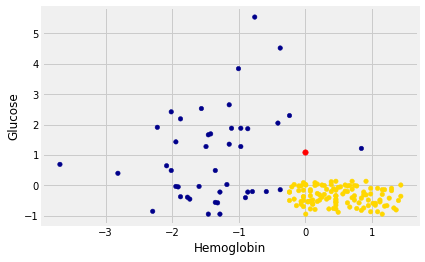

In [9]:
alice = np.array([0, 1.1])
ckd.plot.scatter('Hemoglobin', 'Glucose',
                 c=ckd['Color'])
plt.scatter(alice[0], alice[1], color='red', s=30);

To find the distance between Alice's point and any of the other points, we only need the values of the attributes:

In [10]:
# Select Hemoglobin and Glucose columns from the data frame
ckd_attributes = ckd.loc[:, ['Hemoglobin', 'Glucose']]
ckd_attributes.head()

,Hemoglobin,Glucose
0,-0.865744,-0.221549
1,-1.457446,-0.947597
2,-1.004968,3.841231
3,-2.814879,0.396364
4,-2.083954,0.643529


Each row consists of the coordinates of one point in our training sample. **Because the rows now consist only of numerical values**, it is possible to convert them to numerical arrays.  For this, we use the function `np.array`, which converts any kind of sequential object, like a row, to an array.

In [11]:
ckd_attributes.iloc[3]

Hemoglobin   -2.814879
Glucose       0.396364
Name: 3, dtype: float64

In [12]:
np.array(ckd_attributes.iloc[3])

array([-2.81487943,  0.39636401])

This is very handy because we can now use array operations on the data in each row.

### Distance Between Points When There are Two Attributes ###

The main calculation we need to do is to find the distance between Alice's point and any other point. For this, the first thing we need is a way to compute the distance between any pair of points.

How do we do this?  In 2-dimensional space, it's pretty easy.  If we have a point at coordinates $(x_0,y_0)$ and another at $(x_1,y_1)$, the distance between them is

$$
D = \sqrt{(x_0-x_1)^2 + (y_0-y_1)^2}
$$

(Where did this come from?  It comes from the Pythogorean theorem: we have a right triangle with side lengths $x_0-x_1$ and $y_0-y_1$, and we want to find the length of the hypotenuse.)

In the next section we'll see that this formula has a straightforward extension when there are more than two attributes. For now, let's use the formula and array operations to find the distance between Alice and the patient in Row 3.

In [13]:
patient3 = np.array(ckd_attributes.iloc[3])
alice, patient3

(array([0. , 1.1]), array([-2.81487943,  0.39636401]))

In [14]:
distance = np.sqrt(np.sum((alice - patient3)**2))
distance

2.901490965127261

We're going to need the distance between Alice and a bunch of points, so let's write a function called `distance` that computes the distance between any pair of points. The function will take two arrays, each containing the $(x, y)$ coordinates of a point.  (Remember, those are really the Hemoglobin and Glucose levels of a patient.)

In [15]:
def distance(point1, point2):
    """Returns the Euclidean distance between point1 and point2.

    Each argument is an array containing the coordinates of a point."""
    return np.sqrt(np.sum((point1 - point2)**2))

In [16]:
distance(alice, patient3)

2.901490965127261

We have begun to build our classifier: the `distance` function is the first building block. Now let's work on the next piece.

### Using `apply` on an Entire Row ###

Sometimes we want to be able to *apply* some function to a whole row of a data frame.

You won't be surprised to learn that Pandas has an `apply` method that can do this.

Let's see how this works on a very small table `t` containing the information about the first five patients in the training sample.  Here we are using `iloc` again, to get values from the data frame by index.  In this case, we want the first five rows.

In [17]:
t = ckd_attributes.iloc[0:5]
t

,Hemoglobin,Glucose
0,-0.865744,-0.221549
1,-1.457446,-0.947597
2,-1.004968,3.841231
3,-2.814879,0.396364
4,-2.083954,0.643529


Just as an example, suppose that for each patient we want to know how unusual their most unusual attribute is.  Concretely, if a patient's hemoglobin level is further from the average than her glucose level, we want to know how far it is from the average.  If her glucose level is further from the average than her hemoglobin level, we want to know how far that is from the average instead.

That's the same as taking the maximum of the absolute values of the two quantities. To do this for a particular row, we can convert the row to an array and use array operations.

In [18]:
def max_abs(row):
    return np.max(np.abs(np.array(row)))

In [19]:
max_abs(t.iloc[4])

2.0839536249919064

And now we can apply `max_abs` to each row of the table `t`. We pass the `axis` argument to tell Pandas to apply the function along the *rows* (and therefore along the second axis).

In [20]:
t.apply(max_abs, axis=1)

0    0.865744
1    1.457446
2    3.841231
3    2.814879
4    2.083954
dtype: float64

This way of using `apply` will help us create the next building block of our classifier.

### Alice's $k$ Nearest Neighbors ###

If we want to classify Alice using a k-nearest neighbor classifier, we have to identify her $k$ nearest neighbors. What are the steps in this process? Suppose $k = 5$. Then the steps are:

- **Step 1.** Find the distance between Alice and each point in the training sample.
- **Step 2.** Sort the data table in increasing order of the distances.
- **Step 3.** Take the top 5 rows of the sorted table.

Steps 2 and 3 seem straightforward, provided we have the distances. So let's focus on Step 1.

Here's Alice:

In [21]:
alice

array([0. , 1.1])

What we need is a function that finds the distance between Alice and another point whose coordinates are contained in a row. The function `distance` returns the distance between any two points whose coordinates are in arrays. We can use that to define `distance_from_alice`, which takes a row as its argument and returns the distance between that row and Alice.

In [22]:
def distance_from_alice(row):
    """Returns distance between Alice and a row of the attributes table"""
    return distance(alice, np.array(row))

In [23]:
distance_from_alice(ckd_attributes.iloc[3])

2.901490965127261

Now we can `apply` the function `distance_from_alice` to each row of `ckd_attributes`, and augment the table `ckd` with the distances. Step 1 is complete!

In [24]:
distances = ckd_attributes.apply(distance_from_alice, axis=1)
ckd_with_distances = ckd.copy()
ckd_with_distances['Distance from Alice'] = distances
ckd_with_distances.head()

,Hemoglobin,Glucose,Class,Color,Distance from Alice
0,-0.865744,-0.221549,1,darkblue,1.579875
1,-1.457446,-0.947597,1,darkblue,2.513325
2,-1.004968,3.841231,1,darkblue,2.919641
3,-2.814879,0.396364,1,darkblue,2.901491
4,-2.083954,0.643529,1,darkblue,2.133361


For Step 2, let's sort the table in increasing order of distance:

In [25]:
sorted_by_distance = ckd_with_distances.sort_values('Distance from Alice')
sorted_by_distance.head()

,Hemoglobin,Glucose,Class,Color,Distance from Alice
14,0.839750,1.215099,1,darkblue,0.847601
35,-0.970162,1.276890,1,darkblue,0.986156
84,-0.030400,0.087407,0,gold,1.013049
152,0.143630,0.087407,0,gold,1.022728
6,-0.413266,2.049282,1,darkblue,1.035338


Step 3: The top 5 rows correspond to Alice's 5 nearest neighbors; you can replace 5 by any other positive integer.

In [26]:
alice_5_nearest_neighbors = sorted_by_distance.iloc[:5]
alice_5_nearest_neighbors

,Hemoglobin,Glucose,Class,Color,Distance from Alice
14,0.839750,1.215099,1,darkblue,0.847601
35,-0.970162,1.276890,1,darkblue,0.986156
84,-0.030400,0.087407,0,gold,1.013049
152,0.143630,0.087407,0,gold,1.022728
6,-0.413266,2.049282,1,darkblue,1.035338


Three of Alice's five nearest neighbors are blue points and two are gold. So a 5-nearest neighbor classifier would classify Alice as blue: it would predict that Alice has chronic kidney disease.

The graph below zooms in on Alice and her five nearest neighbors. The two gold ones just inside the circle directly below the red point. The classifier says Alice is more like the three blue ones around her.

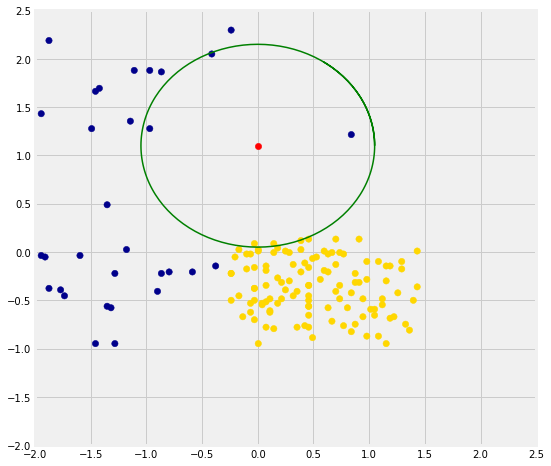

In [27]:
# NO CODE
plt.figure(figsize=(8,8))
plt.scatter(ckd['Hemoglobin'], ckd['Glucose'],
            c=ckd['Color'], s=40)
plt.scatter(alice[0], alice[1], color='red', s=40)
radius = sorted_by_distance['Distance from Alice'].iloc[4]+0.014
theta = np.arange(0, 2*np.pi+1, 2*np.pi/200)
plt.plot(radius * np.cos(theta) + alice[0],
         radius * np.sin(theta) + alice[1],
         color='g', lw=1.5);
plt.xlim(-2, 2.5)
plt.ylim(-2, 2.5);

We are well on our way to implementing our k-nearest neighbor classifier. In the next two sections we will put it together and assess its accuracy.

{% data8page Rows_of_Tables %}